In [1]:
from pathlib import Path
path = Path('/home/alilavaee/Desktop/PlantifyDr/PlantDiseasesDataset')

In [2]:
# Download dataset with Kaggle API
# ! kaggle datasets download lavaman151/plantifydr-dataset --unzip

In [3]:
from fastai.vision.all import *

In [4]:
path.ls()

(#10) [Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Bell pepper'),Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Corn'),Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Grape'),Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Strawberry'),Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Citrus'),Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Tomato'),Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Cherry'),Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Peach'),Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Potato'),Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Apple')]

In [5]:
plant_list = ['Apple','Bell pepper','Cherry','Citrus','Corn','Grape','Peach','Potato','Strawberry','Tomato']
plant = 'Corn'

In [6]:
model_path = Path(path/plant)

In [7]:
def dls(size):
    batch_tfms=[*aug_transforms(),Normalize.from_stats(*imagenet_stats)]
    return(ImageDataLoaders.from_folder(path/plant,train='train',valid='valid',seed=1000,item_tfms=
                                       Resize(size),batch_tfms=batch_tfms,bs=64))

In [8]:
data_112 = dls(112)
data_224 = dls(224)

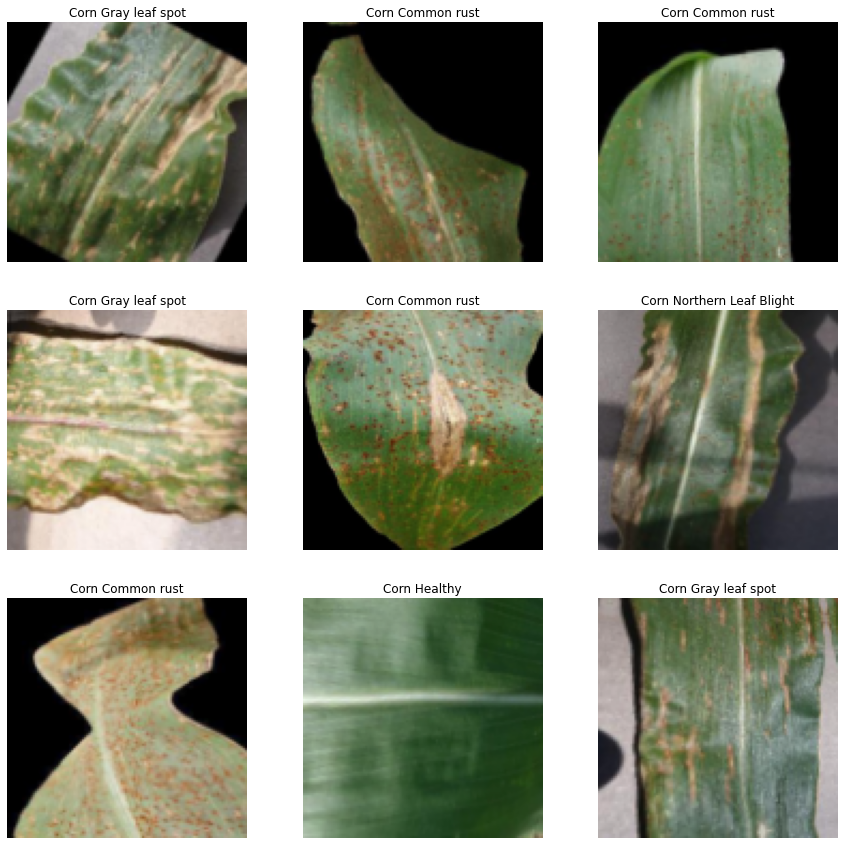

In [9]:
data_112.show_batch(figsize=(15,15))

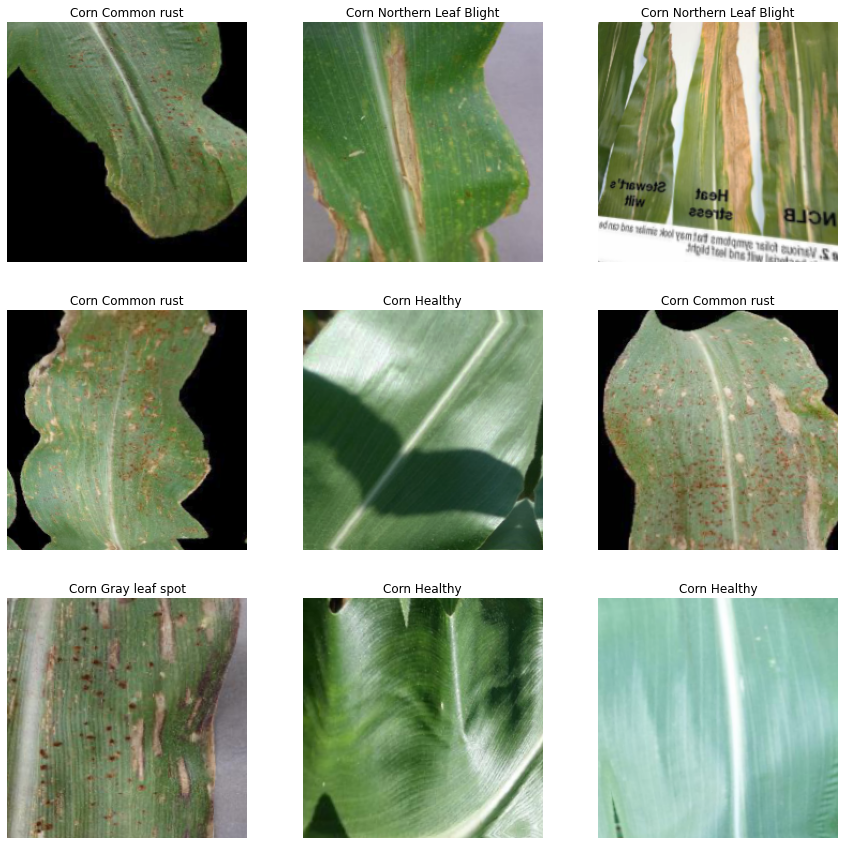

In [10]:
data_224.show_batch(figsize=(15,15))

In [11]:
f1 = F1Score(average='weighted')
#mixup1 = MixUp(alpha = 0.7)

In [12]:
learner_112 = cnn_learner(data_112, models.resnet50,loss_func=LabelSmoothingCrossEntropy(),metrics=[accuracy,f1],
                    cbs=[SaveModelCallback(monitor='accuracy'),
                         EarlyStoppingCallback(monitor='accuracy',patience=2)],
                    model_dir=model_path/'models')

In [13]:
#learner_112.lr_find()

In [14]:
#learner_112.fit(1, 1e-2)

In [15]:
learner_112.fit_sgdr(3,1)

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.604782,1.176654,0.600000,0.595853,00:25
1,0.492199,0.966580,0.600000,0.593200,00:23
2,0.455550,0.969677,0.542857,0.534615,00:23


Better model found at epoch 0 with accuracy value: 0.6000000238418579.
No improvement since epoch 0: early stopping


In [16]:
learner_112.save(model_path/'models/learner_112')

Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Corn/models/learner_112.pth')

In [17]:
#mixup2 = MixUp(alpha = 0.4)

In [18]:
learner_224 = cnn_learner(data_224, models.resnet50,loss_func=LabelSmoothingCrossEntropy(),metrics=[accuracy,f1],
                    cbs=[SaveModelCallback(monitor='accuracy'),
                         EarlyStoppingCallback(monitor='accuracy',patience=2)],
                    model_dir=model_path/'models').load(model_path/'models/learner_112')

In [19]:
#learner_224.lr_find()

In [20]:
#learner_224.fit(5,1e-5)

In [21]:
learner_224.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.509416,0.960558,0.628571,0.619894,01:15


Better model found at epoch 0 with accuracy value: 0.6285714507102966.


epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.430250,1.032693,0.600000,0.598503,01:34
1,0.402116,0.859400,0.714286,0.731339,01:33
2,0.381280,1.048074,0.628571,0.632225,01:33
3,0.367748,0.935846,0.685714,0.683333,01:33


Better model found at epoch 0 with accuracy value: 0.6000000238418579.
Better model found at epoch 1 with accuracy value: 0.7142857313156128.
No improvement since epoch 1: early stopping


In [22]:
learner_224.save(model_path/'models/learner_224')

Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Corn/models/learner_224.pth')

In [23]:
learner_224.save(model_path/f'models/{plant}')

Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Corn/models/Corn.pth')

In [24]:
learner_224 = cnn_learner(data_224, models.resnet50).load(model_path/f'models/{plant}')

In [25]:
learner_224.summary()

Sequential (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
Conv2d                                    4096       False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
____________________________________________________________________________
                     64 x 256 x 56 x 56  
Conv2d                                    16384      False     
BatchNorm2d                               512        True      
ReLU                                                           
__________________________________________

In [26]:
learner_224.export(f'{plant}.pkl')